In [1]:
using Plots, Statistics, Random, LaTeXStrings, LinearAlgebra, Flux
using Flux: throttle
using Statistics: mean 

readclassjson (generic function with 1 method)

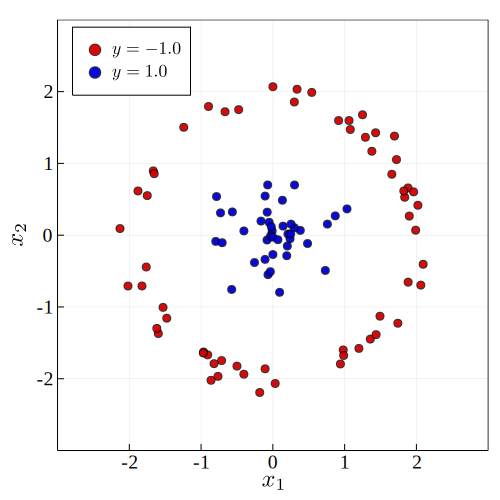

In [24]:
# GENERATE DATA
circOut_nsize = 60 
theta = 2*pi*rand(circOut_nsize)
r = 2 .+ (-0.2 .+ 0.4*rand(circOut_nsize))
circOut = hcat([ [r[i]*cos(theta[i]); r[i]*sin(theta[i])] for i in 1:length(r)]...)
yOut = 0.0*zeros(circOut_nsize)

circIn_nsize = 40
theta = 2*pi*rand(circIn_nsize)
r = (rand(circIn_nsize)) .+ (-0.2 .+ 0.4*rand(circIn_nsize))
circIn = hcat([ [norm(r[i])*cos(theta[i]); norm(r[i])*sin(theta[i])] for i in 1:length(r)]...)
yIn = 1.0*ones(circIn_nsize)

plt = Plots.scatter(circOut[1,:], circOut[2, :], 
                color = :red, 
                alpha = 0.8, 
                markersize = 4, 
                markerstrokecolor = :match,
                label = "\$y = -1.0\$") 
Plots.scatter!(plt, circIn[1,:], circIn[2, :], 
                color = :blue, 
                alpha = 0.8, 
                markersize = 4, 
                markerstrokecolor = :match,
                label = "\$y = 1.0\$",
                xlabel = "\$x_1\$", 
                ylabel = "\$x_2\$", 
                aspect_ratio = :equal, 
                framestyle = :box, 
                xlim = (-3, 3), ylim = (-3, 3), 
                xticks = -2:1:2, 
                yticks = -2:1:2, 
                guidefontsize = 16, legendfontsize = 12, tickfontsize = 12, fontfamily = "Times", 
                size = (500 , 500), legend = :topleft)                 


In [26]:
# Randomize order of blue and red points
N = circOut_nsize + circIn_nsize
indx = randperm(N)
circ = [circOut circIn]
labels = [yOut; yIn]

x = [circ[1, indx]'; circ[2, indx]']
y = labels[indx]'

# Encode labels as blue = -1, red = 1.
y = 2*y .- 1;

In [27]:
# Train a 2-layer neural network on the entire dataset
model = Chain(
    Dense(2, 4, sigmoid),
    Dense(4, 2, sigmoid),
    Dense(2, 1),
) 

# Define a logistic loss function
logisticloss(ŷ, y) = sum(log.(1 .+ exp.(-ŷ .* y))) / length(y)
loss(x, y) = logisticloss(model(x), y) #+ sum(norm, params(model))

# Choose an optimizer and its parameters
optimiser =  ADAM(0.05)
# optimiser =  AMSGrad()
# optimiser = SGD(params(model), 0.1)  # deprecated

evalcb = () -> @show(loss(x, y))

dataset = Iterators.repeated((x, y), 500)
Flux.train!(loss, params(model), dataset, optimiser, cb = evalcb)

accuracy(x, y) = mean(sign.(model(x)) .== y)
println("\nModel accuracy = $(accuracy(x, y))")

loss(x, y) = 0.6732157188667448 (tracked)
loss(x, y) = 0.6724422180114231 (tracked)
loss(x, y) = 0.6728263346849553 (tracked)
loss(x, y) = 0.6721815266864397 (tracked)
loss(x, y) = 0.6705220527975281 (tracked)
loss(x, y) = 0.6684262433163657 (tracked)
loss(x, y) = 0.6663439899521275 (tracked)
loss(x, y) = 0.6644459973890346 (tracked)
loss(x, y) = 0.6626285503253351 (tracked)
loss(x, y) = 0.6606357363032664 (tracked)
loss(x, y) = 0.6582387223722452 (tracked)
loss(x, y) = 0.6553486296851233 (tracked)
loss(x, y) = 0.6520022167045643 (tracked)
loss(x, y) = 0.6482875258901831 (tracked)
loss(x, y) = 0.6442829500984218 (tracked)
loss(x, y) = 0.6400331308615392 (tracked)
loss(x, y) = 0.6355525425264102 (tracked)
loss(x, y) = 0.6308398688152773 (tracked)
loss(x, y) = 0.6258930047849323 (tracked)
loss(x, y) = 0.6207211945714982 (tracked)
loss(x, y) = 0.6153533520236821 (tracked)
loss(x, y) = 0.6098409026035132 (tracked)
loss(x, y) = 0.6042536039347618 (tracked)
loss(x, y) = 0.5986691262835471 (t

loss(x, y) = 0.00642190337947869 (tracked)
loss(x, y) = 0.00635646633505617 (tracked)
loss(x, y) = 0.006292255163464081 (tracked)
loss(x, y) = 0.006229229560510372 (tracked)
loss(x, y) = 0.006167356093026964 (tracked)
loss(x, y) = 0.00610660339494103 (tracked)
loss(x, y) = 0.0060469393698993614 (tracked)
loss(x, y) = 0.005988334567684799 (tracked)
loss(x, y) = 0.005930760483691322 (tracked)
loss(x, y) = 0.005874187206056953 (tracked)
loss(x, y) = 0.005818589933131783 (tracked)
loss(x, y) = 0.005763940939431573 (tracked)
loss(x, y) = 0.00571021594781391 (tracked)
loss(x, y) = 0.005657392852431142 (tracked)
loss(x, y) = 0.005605446669835772 (tracked)
loss(x, y) = 0.005554355678861632 (tracked)
loss(x, y) = 0.005504097825946392 (tracked)
loss(x, y) = 0.005454652776707056 (tracked)
loss(x, y) = 0.005406000117257026 (tracked)
loss(x, y) = 0.005358119333153944 (tracked)
loss(x, y) = 0.005310993832396315 (tracked)
loss(x, y) = 0.005264604771060622 (tracked)
loss(x, y) = 0.005218931806431116 (


Model accuracy = 1.0


In [28]:
weights = params(model)
for w in weights
    display(w)
end

Tracked 4×2 Array{Float32,2}:
  6.08689  -0.982487
 -3.38873   1.74982 
  2.69667   3.91712 
 -1.94108   5.6369  

Tracked 4-element Array{Float32,1}:
  6.009959f0
  4.427579f0
 -4.963252f0
  5.387834f0

Tracked 2×4 Array{Float32,2}:
 -5.74671  -0.197884  6.67725  -5.77691
 -5.31323  -0.207606  6.31146  -5.44995

Tracked 2-element Array{Float32,1}:
 7.6077056f0
 7.0605607f0

Tracked 1×2 Array{Float32,2}:
 -7.55359  -9.09779

Tracked 1-element Array{Float32,1}:
 6.832047f0

In [29]:
sum(model(x) .>= 0 ), sum(y .>= 0), sum(model(x) .< 0 ), sum(y .< 0)

(40, 40, 60, 60)

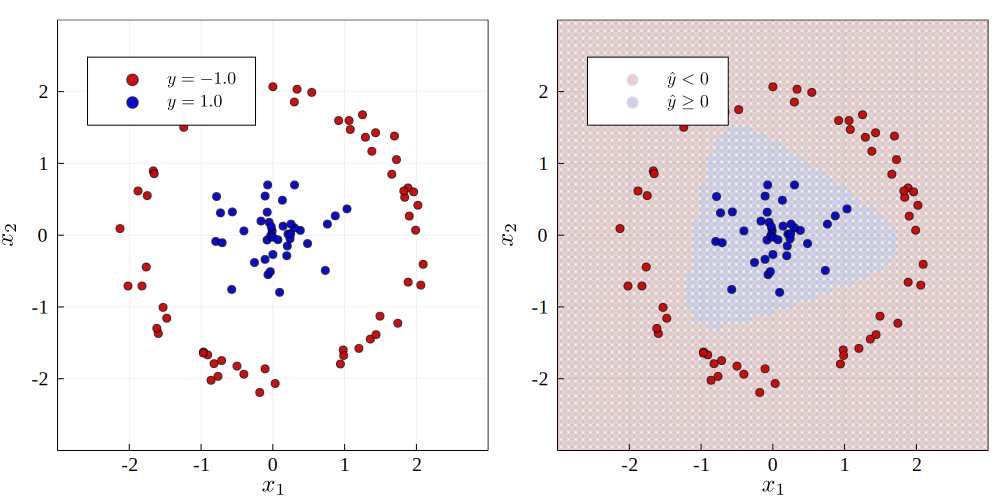

In [30]:
# Plot decision boundary 
x1 = range(-3, 3, length = 60)
x2 = range(-3, 3, length = 60)

x1_grid = repeat(x1', 60, 1)
x2_grid = repeat(x2, 1, 60)

size(x1_grid), size(x2_grid)

xplot = hcat([[x1_grid[i]; x2_grid[i]] for i = 1:length(x1_grid)]...)
yplot = sign.(model(xplot))

# Plot data and color code by class
yplot_uniq = unique(yplot)
yplot_id_unique = [[i for i = 1:length(yplot) if yplot[i] == yplot_uniq[k] ] for k in 1:length(yplot_uniq)]

plt2 = Plots.scatter(xplot[1, yplot_id_unique[1]], xplot[2, yplot_id_unique[1]], 
                color = :red, 
                alpha = 0.1, 
                markersize = 6, 
                markerstrokecolor = :match,
                label = latexstring("\$\\hat y < 0\$")) 
Plots.scatter!(plt2, xplot[1, yplot_id_unique[2]], xplot[2, yplot_id_unique[2]], 
                color = :blue, 
                alpha = 0.1,
                markersize = 6, 
                markerstrokecolor = :match,
                label = latexstring("\$\\hat y \\ge 0\$"),
                xlabel = "\$x_1\$", 
                ylabel = "\$x_2\$", 
                aspect_ratio = :equal, 
                framestyle = :box, 
                xlim = (-3, 3), ylim = (-3, 3), 
                xticks = -2:1:2, 
                yticks = -2:1:2, 
                guidefontsize = 16, legendfontsize = 12, tickfontsize = 12, fontfamily = "Times", 
                size = (500 , 500), 
                legend = :topleft)               

Plots.scatter!(plt2, circOut[1,:], circOut[2, :], 
                color = :red, 
                alpha = 0.8, 
                markersize = 4, 
                markerstrokecolor = :match,
                label = "") 
Plots.scatter!(plt2, circIn[1,:], circIn[2, :], 
                color = :blue, 
                alpha = 0.8, 
                markersize = 4, 
                markerstrokecolor = :match,
                label = "")                 

plot(plt, plt2, layout = (1,2), size = (1000, 500))